# Scipy

## Curve fitting

First we need to import required packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit

Here we define our 1-d function with three parameters _a, b, c_

In [2]:
def fun(x, a, b, c):
    return a * np.sin(b * x) + c

We set initial values for the parameters, calculate _y_ values and add some noise

In [3]:
a = 2.5
b = 1.3
c = 0.5
x = np.linspace(-10, 10)
y = fun(x, a, b, c) + np.array([np.random.random() for _ in range(len(x))])

Finally, we use `curve_fit` to reconstruct the input parameters. `xplot` will be used to plot smoother curve.

[ 2.51313222  1.30359918  0.99285155]


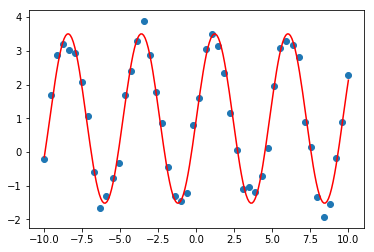

In [4]:
xplot = np.linspace(-10, 10, 200)
pars, pcov = curve_fit(fun, x, y)
plt.scatter(x, y)
plt.plot(xplot, fun(xplot, *pars), '-r')
print(pars)